# Confirmatory Data Analysis 
> Using traditional statistical tools such as significance, confidence, and inference to test the influence of code conceps in performance. 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<ipython-input-1-ac09909db896>:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
#! pip install dowhy
from dowhy import CausalModel
import dowhy.datasets

In [3]:
from pathlib import Path
import csv
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import functools

pd.options.display.float_format = '{:.2f}'.format

In [4]:
import seaborn as sns
sns.set_theme(style="darkgrid")


In [5]:
%matplotlib inline

## Load Data Samples

In [6]:
#Load data samples
eval_df = pd.read_csv(
    '/workspaces/CodeCheckList/data/linguistic_capabilities/huggingface-CodeBERTa-small-v1_100.0_20.csv',
    index_col=0
    )

In [7]:
eval_df.head(2)

,sample_id,ast_element,sample,masking_rate,numper_of_masked_tokens,ast_element_ocurrences,mask_jaccard,mask_sorensen_dice,mask_levenshtein,mask_random_avg_jaccard,...,mask_random_std_jaccard,mask_random_std_sorensen_dice,mask_random_std_levenshtein,n_ast_errors,ast_levels,n_whitespaces_,complexity,nloc,token_counts,n_ast_nodes
0,0,comparison_operator,def test_should_generate_secret_with_specified...,1.00,20,1,0.85,0.92,0.90,0.98,...,0.03,0.01,0.02,0,15,29,1,15,50,96
1,0,identifier,def test_should_generate_secret_with_specified...,1.00,24,9,0.82,0.90,0.83,0.94,...,0.05,0.03,0.04,0,15,29,1,15,50,96


In [8]:
eval_df.describe()

,sample_id,masking_rate,numper_of_masked_tokens,ast_element_ocurrences,mask_jaccard,mask_sorensen_dice,mask_levenshtein,mask_random_avg_jaccard,mask_random_avg_sorensen_dice,mask_random_avg_levenshtein,mask_random_std_jaccard,mask_random_std_sorensen_dice,mask_random_std_levenshtein,n_ast_errors,ast_levels,n_whitespaces_,complexity,nloc,token_counts,n_ast_nodes
count,45613.00,45613.00,45613.00,45613.00,45613.00,45613.00,45613.00,45613.00,45613.00,45613.00,45613.00,45613.00,45613.00,45613.00,45613.00,45613.00,45613.00,45613.00,45613.00,45613.00
mean,5771.33,1.00,35.78,8.61,0.78,0.86,0.79,0.88,0.92,0.87,0.07,0.05,0.07,0.05,11.58,39.66,2.58,12.71,87.94,143.63
std,3228.58,0.00,49.18,15.86,0.21,0.16,0.21,0.15,0.10,0.16,0.07,0.06,0.07,0.30,3.04,33.41,2.56,10.55,70.49,108.94
min,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.03,0.06,0.03,0.00,0.00,0.00,0.00,4.00,2.00,1.00,1.00,5.00,8.00
25%,2993.00,1.00,6.00,1.00,0.68,0.81,0.68,0.80,0.88,0.80,0.02,0.01,0.02,0.00,10.00,15.00,1.00,5.00,36.00,59.00
50%,5846.00,1.00,16.00,1.00,0.84,0.91,0.85,0.94,0.97,0.95,0.06,0.03,0.06,0.00,11.00,29.00,1.00,10.00,69.00,114.00
75%,8479.00,1.00,45.00,8.00,0.95,0.97,0.96,0.99,1.00,0.99,0.11,0.08,0.11,0.00,13.00,55.00,3.00,18.00,121.00,202.00
max,11400.00,1.00,473.00,156.00,1.00,1.00,1.00,1.00,1.00,1.00,0.43,0.43,0.43,19.00,27.00,214.00,45.00,171.00,1130.00,648.00


In [9]:
eval_df.columns

Index(['sample_id', 'ast_element', 'sample', 'masking_rate',
       'numper_of_masked_tokens', 'ast_element_ocurrences', 'mask_jaccard',
       'mask_sorensen_dice', 'mask_levenshtein', 'mask_random_avg_jaccard',
       'mask_random_avg_sorensen_dice', 'mask_random_avg_levenshtein',
       'mask_random_std_jaccard', 'mask_random_std_sorensen_dice',
       'mask_random_std_levenshtein', 'n_ast_errors', 'ast_levels',
       'n_whitespaces_', 'complexity', 'nloc', 'token_counts', 'n_ast_nodes'],
      dtype='object')

In [10]:
set(eval_df['ast_element'])

{'boolean_operator',
 'comparison_operator',
 'for_in_clause',
 'for_statement',
 'identifier',
 'if_clause',
 'if_statement',
 'parameters',
 'return_statement',
 'string',
 'while_statement'}

## Concept-Level Analysis

### Jaccard Metric

In [20]:
eval_df[['mask_jaccard','mask_random_avg_jaccard','ast_element']].groupby('ast_element').describe()

mask_jaccard                                     \
                           count mean  std  min  25%  50%  75%  max   
ast_element                                                           
boolean_operator          812.00 0.83 0.15 0.15 0.78 0.88 0.93 0.99   
comparison_operator      4915.00 0.82 0.16 0.00 0.74 0.87 0.94 1.00   
for_in_clause             848.00 0.87 0.11 0.29 0.82 0.90 0.95 1.00   
for_statement            1204.00 0.55 0.22 0.07 0.38 0.56 0.73 0.96   
identifier              11401.00 0.82 0.16 0.03 0.76 0.85 0.93 1.00   
if_clause                 180.00 0.90 0.08 0.51 0.86 0.92 0.95 1.00   
if_statement             2868.00 0.52 0.22 0.07 0.34 0.52 0.70 0.97   
parameters              11401.00 0.86 0.22 0.02 0.79 0.98 1.00 1.00   
return_statement         4154.00 0.77 0.22 0.05 0.61 0.82 0.98 1.00   
string                   7721.00 0.72 0.17 0.09 0.60 0.74 0.86 1.00   
while_statement           109.00 0.54 0.24 0.11 0.33 0.49 0.75 0.95   

                    mask_random_avg_jaccard                                     
                                      count mean  std  min  25%  50%  75%  max  
ast_element                                                                     
boolean_operator                     812.00 0.95 0.09 0.24 0.95 0.99 0.99 1.00  
comparison_operator                 4915.00 0.93 0.13 0.03 0.92 0.98 0.99 1.00  
for_in_clause                        848.00 0.97 0.05 0.61 0.97 0.99 1.00 1.00  
for_statement                       1204.00 0.79 0.18 0.23 0.67 0.84 0.94 1.00  
identifier                         11401.00 0.79 0.12 0.19 0.72 0.80 0.88 1.00  
if_clause                            180.00 0.98 0.03 0.77 0.98 0.99 1.00 1.00  
if_statement                        2868.00 0.75 0.20 0.14 0.60 0.79 0.93 1.00  
parameters                         11401.00 0.97 0.06 0.37 0.97 0.99 1.00 1.00  
return_statement                    4154.00 0.87 0.17 0.13 0.78 0.95 1.00 1.00  
string                              7721.00 0.89 0.14 0.06 0.85 0.95 0.98 1.00  
while_statement                      109.00 0.76 0.20 0.14 0.60 0.78 0.95 1.00

boolean_operator            AxesSubplot(0.1,0.559091;0.114286x0.340909)
comparison_operator    AxesSubplot(0.237143,0.559091;0.114286x0.340909)
for_in_clause          AxesSubplot(0.374286,0.559091;0.114286x0.340909)
for_statement          AxesSubplot(0.511429,0.559091;0.114286x0.340909)
identifier             AxesSubplot(0.648571,0.559091;0.114286x0.340909)
if_clause              AxesSubplot(0.785714,0.559091;0.114286x0.340909)
if_statement                    AxesSubplot(0.1,0.15;0.114286x0.340909)
parameters                 AxesSubplot(0.237143,0.15;0.114286x0.340909)
return_statement           AxesSubplot(0.374286,0.15;0.114286x0.340909)
string                     AxesSubplot(0.511429,0.15;0.114286x0.340909)
while_statement            AxesSubplot(0.648571,0.15;0.114286x0.340909)
dtype: object

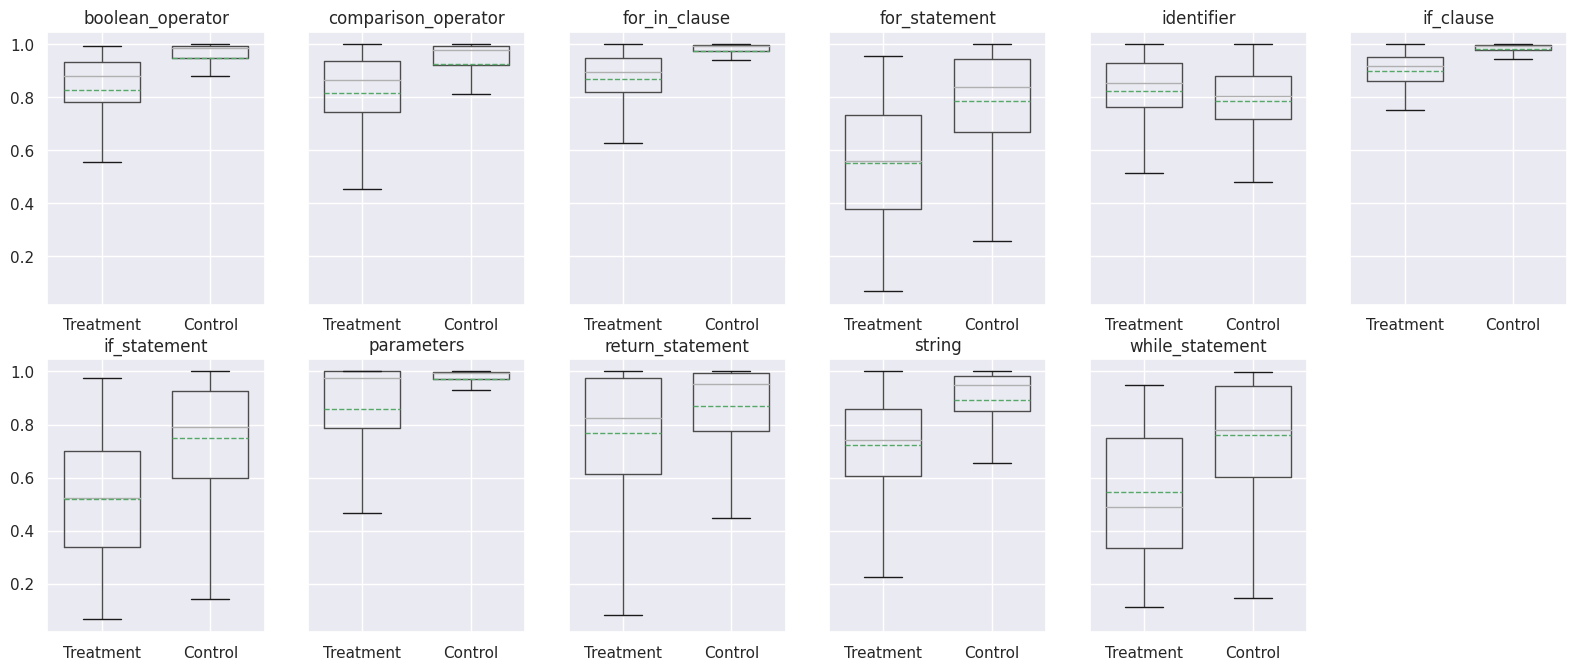

In [39]:
eval_df[['mask_jaccard','mask_random_avg_jaccard','ast_element']].rename(
    columns={'mask_jaccard': 'Treatment', 'mask_random_avg_jaccard': 'Control'}).groupby('ast_element').boxplot(
    layout=(2, 6),
    figsize=(19,8), 
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )

### Levenshtein Metric

In [21]:
eval_df[['mask_levenshtein','mask_random_avg_levenshtein','ast_element']].groupby('ast_element').describe()

mask_levenshtein                                     \
                               count mean  std  min  25%  50%  75%  max   
ast_element                                                               
boolean_operator              812.00 0.84 0.15 0.15 0.80 0.89 0.94 0.99   
comparison_operator          4915.00 0.83 0.16 0.00 0.77 0.89 0.95 1.00   
for_in_clause                 848.00 0.88 0.11 0.29 0.84 0.92 0.96 1.00   
for_statement                1204.00 0.57 0.22 0.07 0.40 0.58 0.76 0.97   
identifier                  11401.00 0.80 0.18 0.03 0.73 0.83 0.92 1.00   
if_clause                     180.00 0.91 0.08 0.57 0.88 0.93 0.96 1.00   
if_statement                 2868.00 0.53 0.23 0.07 0.34 0.54 0.72 0.98   
parameters                  11401.00 0.87 0.21 0.02 0.80 0.98 1.00 1.00   
return_statement             4154.00 0.78 0.22 0.05 0.64 0.84 0.98 1.00   
string                       7721.00 0.75 0.17 0.09 0.63 0.77 0.89 1.00   
while_statement               109.00 0.56 0.24 0.12 0.33 0.55 0.80 0.96   

                    mask_random_avg_levenshtein                                \
                                          count mean  std  min  25%  50%  75%   
ast_element                                                                     
boolean_operator                         812.00 0.95 0.10 0.25 0.95 0.99 1.00   
comparison_operator                     4915.00 0.92 0.14 0.03 0.93 0.98 0.99   
for_in_clause                            848.00 0.98 0.04 0.49 0.98 0.99 1.00   
for_statement                           1204.00 0.76 0.21 0.19 0.63 0.83 0.95   
identifier                             11401.00 0.78 0.13 0.24 0.69 0.79 0.88   
if_clause                                180.00 0.98 0.03 0.79 0.98 0.99 1.00   
if_statement                            2868.00 0.72 0.23 0.13 0.53 0.78 0.93   
parameters                             11401.00 0.97 0.06 0.40 0.98 0.99 1.00   
return_statement                        4154.00 0.87 0.17 0.15 0.79 0.96 1.00   
string                                  7721.00 0.89 0.15 0.05 0.85 0.95 0.99   
while_statement                          109.00 0.73 0.24 0.13 0.55 0.79 0.94   

                          
                     max  
ast_element               
boolean_operator    1.00  
comparison_operator 1.00  
for_in_clause       1.00  
for_statement       1.00  
identifier          1.00  
if_clause           1.00  
if_statement        1.00  
parameters          1.00  
return_statement    1.00  
string              1.00  
while_statement     1.00

boolean_operator            AxesSubplot(0.1,0.559091;0.114286x0.340909)
comparison_operator    AxesSubplot(0.237143,0.559091;0.114286x0.340909)
for_in_clause          AxesSubplot(0.374286,0.559091;0.114286x0.340909)
for_statement          AxesSubplot(0.511429,0.559091;0.114286x0.340909)
identifier             AxesSubplot(0.648571,0.559091;0.114286x0.340909)
if_clause              AxesSubplot(0.785714,0.559091;0.114286x0.340909)
if_statement                    AxesSubplot(0.1,0.15;0.114286x0.340909)
parameters                 AxesSubplot(0.237143,0.15;0.114286x0.340909)
return_statement           AxesSubplot(0.374286,0.15;0.114286x0.340909)
string                     AxesSubplot(0.511429,0.15;0.114286x0.340909)
while_statement            AxesSubplot(0.648571,0.15;0.114286x0.340909)
dtype: object

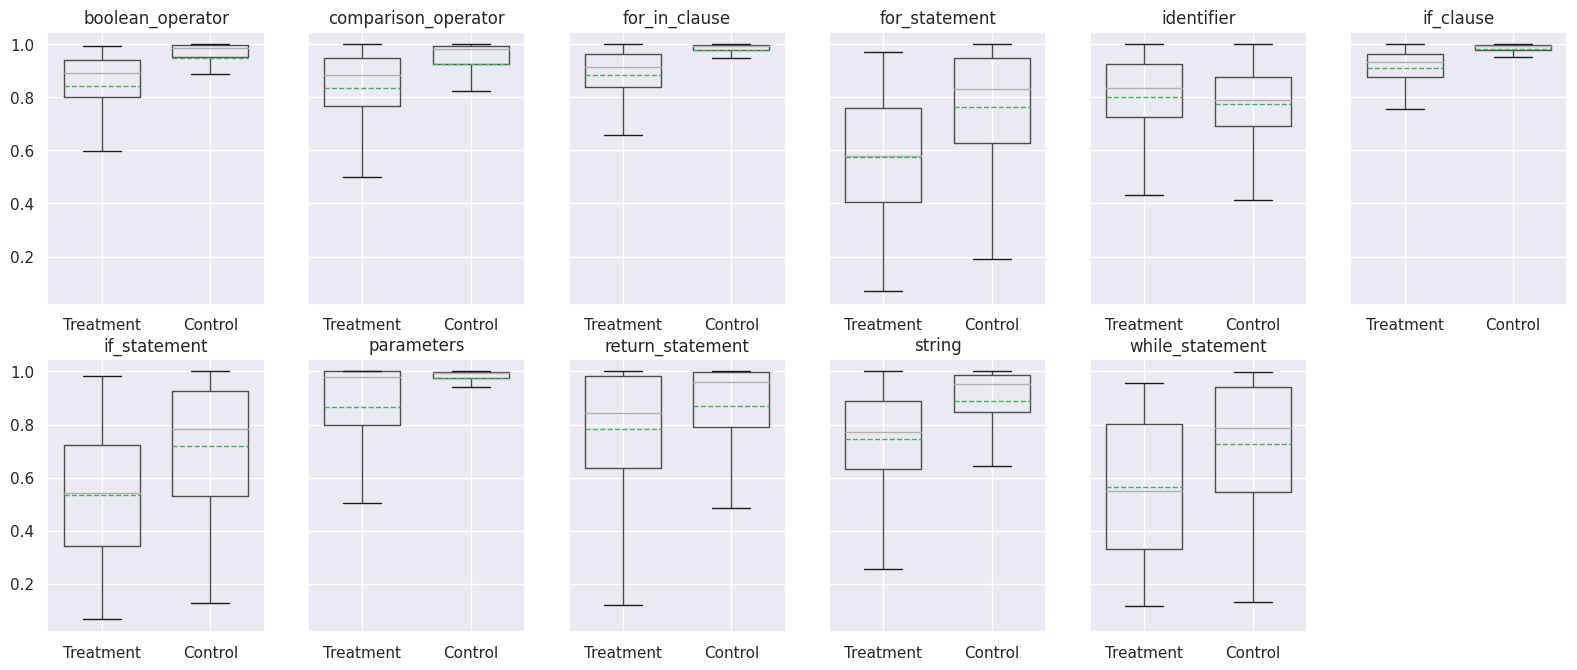

In [38]:
eval_df[['mask_levenshtein','mask_random_avg_levenshtein','ast_element']].rename(
    columns={'mask_levenshtein': 'Treatment', 'mask_random_avg_levenshtein': 'Control'}).groupby('ast_element').boxplot(
    layout=(2, 6),
    figsize=(19,8), 
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )

### Soren Metric

In [22]:
eval_df[['mask_sorensen_dice','mask_random_avg_sorensen_dice','ast_element']].groupby('ast_element').describe()

mask_sorensen_dice                                     \
                                 count mean  std  min  25%  50%  75%  max   
ast_element                                                                 
boolean_operator                812.00 0.90 0.12 0.26 0.88 0.94 0.97 1.00   
comparison_operator            4915.00 0.89 0.12 0.00 0.85 0.93 0.97 1.00   
for_in_clause                   848.00 0.93 0.07 0.45 0.90 0.94 0.97 1.00   
for_statement                  1204.00 0.69 0.19 0.13 0.55 0.72 0.85 0.98   
identifier                    11401.00 0.89 0.13 0.05 0.87 0.92 0.96 1.00   
if_clause                       180.00 0.94 0.05 0.68 0.93 0.96 0.98 1.00   
if_statement                   2868.00 0.65 0.20 0.12 0.50 0.69 0.82 0.99   
parameters                    11401.00 0.90 0.17 0.04 0.88 0.99 1.00 1.00   
return_statement               4154.00 0.85 0.17 0.10 0.76 0.90 0.99 1.00   
string                         7721.00 0.83 0.13 0.17 0.75 0.85 0.92 1.00   
while_statement                 109.00 0.67 0.20 0.20 0.50 0.66 0.86 0.97   

                    mask_random_avg_sorensen_dice                           \
                                            count mean  std  min  25%  50%   
ast_element                                                                  
boolean_operator                           812.00 0.97 0.06 0.38 0.97 0.99   
comparison_operator                       4915.00 0.95 0.09 0.06 0.96 0.99   
for_in_clause                              848.00 0.99 0.03 0.75 0.99 1.00   
for_statement                             1204.00 0.86 0.13 0.37 0.79 0.91   
identifier                               11401.00 0.87 0.09 0.32 0.83 0.88   
if_clause                                  180.00 0.99 0.02 0.86 0.99 1.00   
if_statement                              2868.00 0.83 0.15 0.25 0.74 0.88   
parameters                               11401.00 0.98 0.04 0.53 0.98 1.00   
return_statement                          4154.00 0.92 0.12 0.23 0.86 0.98   
string                                    7721.00 0.93 0.10 0.11 0.91 0.97   
while_statement                            109.00 0.84 0.15 0.25 0.75 0.87   

                               
                     75%  max  
ast_element                    
boolean_operator    1.00 1.00  
comparison_operator 1.00 1.00  
for_in_clause       1.00 1.00  
for_statement       0.97 1.00  
identifier          0.93 1.00  
if_clause           1.00 1.00  
if_statement        0.96 1.00  
parameters          1.00 1.00  
return_statement    1.00 1.00  
string              0.99 1.00  
while_statement     0.96 1.00

boolean_operator            AxesSubplot(0.1,0.559091;0.114286x0.340909)
comparison_operator    AxesSubplot(0.237143,0.559091;0.114286x0.340909)
for_in_clause          AxesSubplot(0.374286,0.559091;0.114286x0.340909)
for_statement          AxesSubplot(0.511429,0.559091;0.114286x0.340909)
identifier             AxesSubplot(0.648571,0.559091;0.114286x0.340909)
if_clause              AxesSubplot(0.785714,0.559091;0.114286x0.340909)
if_statement                    AxesSubplot(0.1,0.15;0.114286x0.340909)
parameters                 AxesSubplot(0.237143,0.15;0.114286x0.340909)
return_statement           AxesSubplot(0.374286,0.15;0.114286x0.340909)
string                     AxesSubplot(0.511429,0.15;0.114286x0.340909)
while_statement            AxesSubplot(0.648571,0.15;0.114286x0.340909)
dtype: object

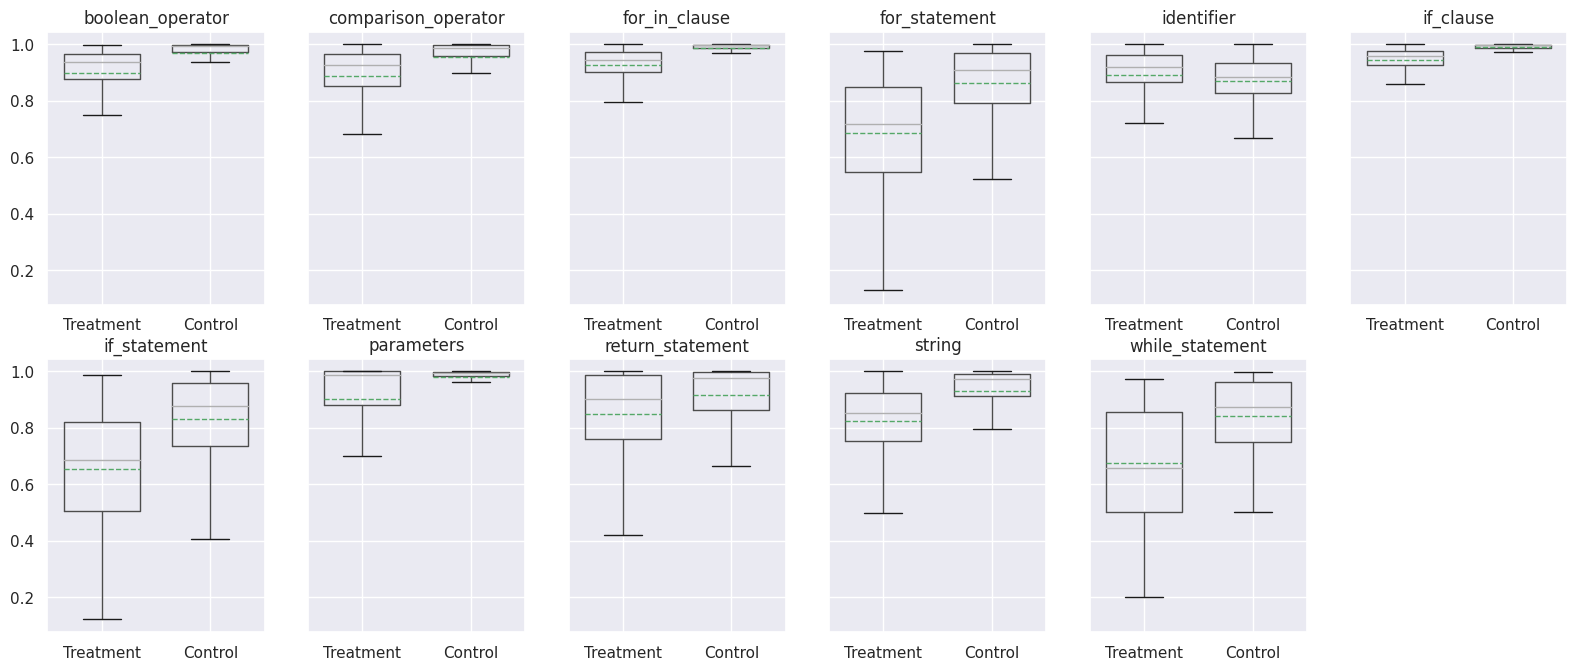

In [40]:
eval_df[['mask_sorensen_dice','mask_random_avg_sorensen_dice','ast_element']].rename(
    columns={'mask_sorensen_dice': 'Treatment', 'mask_random_avg_sorensen_dice': 'Control'}).groupby('ast_element').boxplot(
    layout=(2, 6),
    figsize=(19,8), 
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )

## Data-Level Analysis

<AxesSubplot:>

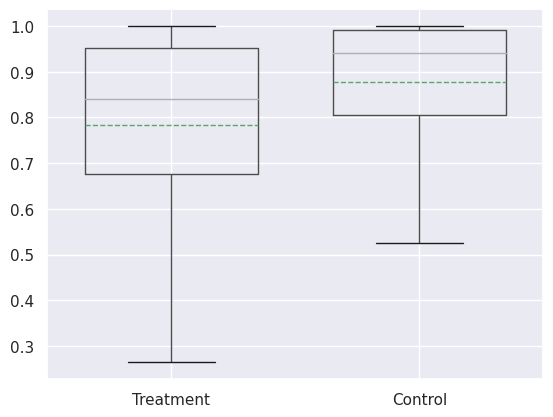

In [50]:
eval_df[['mask_jaccard','mask_random_avg_jaccard']].rename(
    columns={'mask_jaccard': 'Treatment', 'mask_random_avg_jaccard': 'Control'}).boxplot( 
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )

<AxesSubplot:>

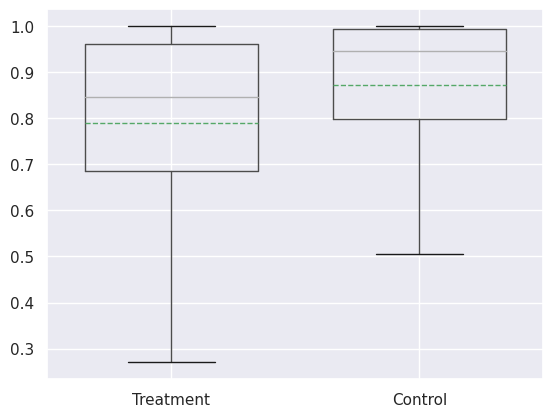

In [49]:
eval_df[['mask_levenshtein','mask_random_avg_levenshtein']].rename(
    columns={'mask_levenshtein': 'Treatment', 'mask_random_avg_levenshtein': 'Control'}).boxplot(
    #layout=(2, 6),
    #figsize=(19,8), 
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )

<AxesSubplot:>

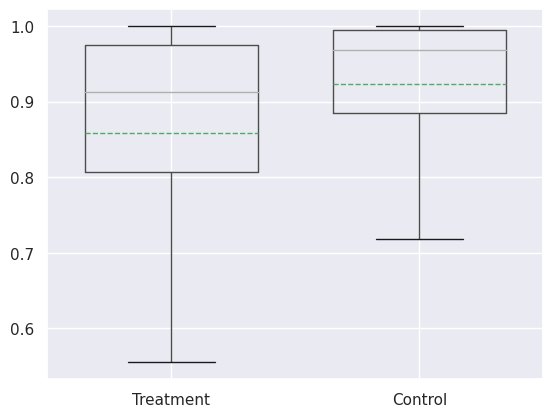

In [48]:
eval_df[['mask_sorensen_dice','mask_random_avg_sorensen_dice']].rename(
    columns={'mask_sorensen_dice': 'Treatment', 'mask_random_avg_sorensen_dice': 'Control'}).boxplot(
    #layout=(2, 6),
    #figsize=(19,8), 
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )

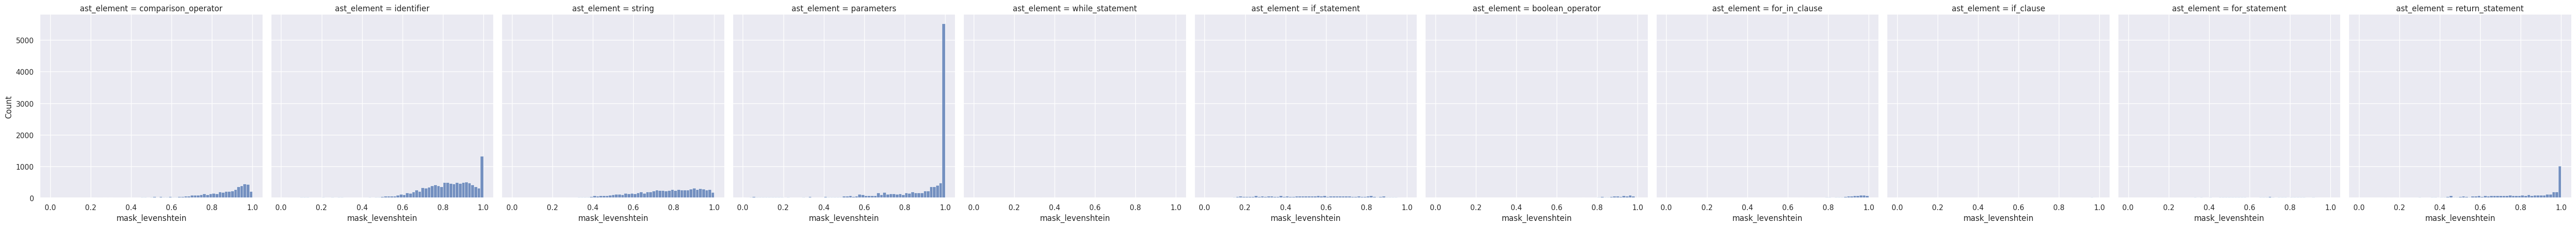

In [11]:
sns.displot(eval_df, x="mask_levenshtein", col="ast_element")

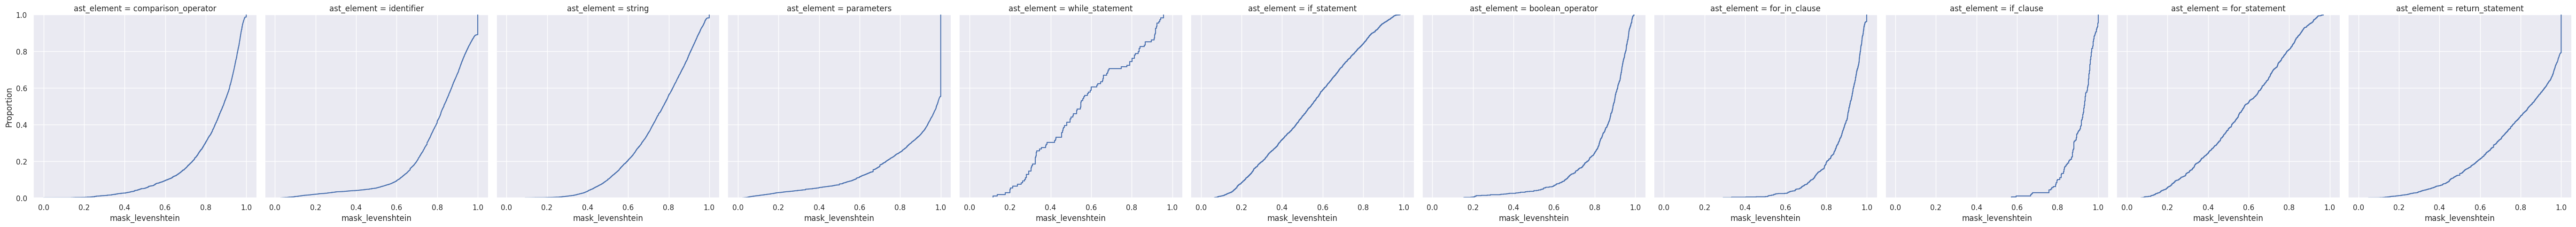

In [12]:
sns.displot(eval_df, x="mask_levenshtein", col="ast_element",kind="ecdf")

The ECDF plot has two key advantages. Unlike the histogram or KDE, it directly represents each datapoint. That means there is no bin size or smoothing parameter to consider. Additionally, because the curve is monotonically increasing, it is well-suited for comparing multiple distributions:

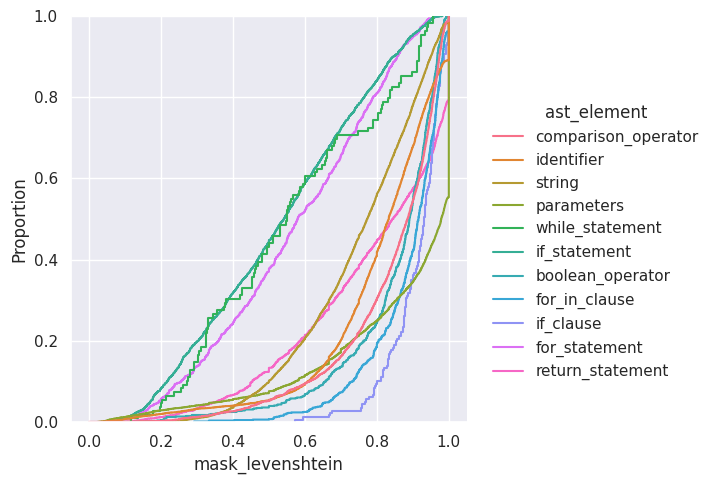

In [18]:
sns.displot(eval_df, x="mask_levenshtein", hue="ast_element",kind="ecdf")

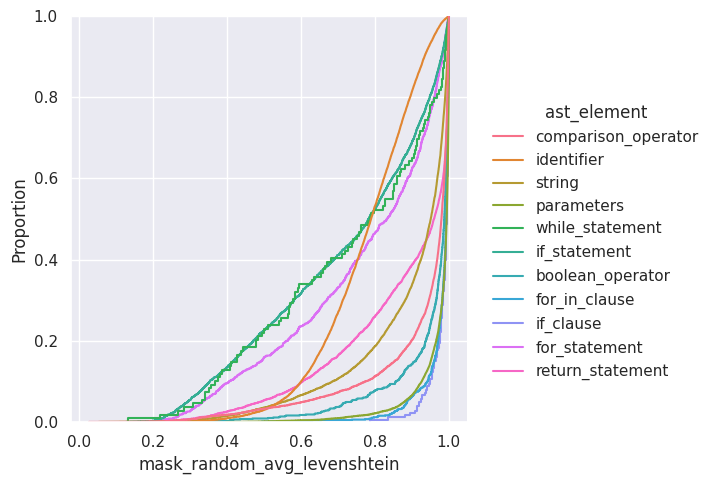

In [47]:
sns.displot(eval_df, x="mask_random_avg_levenshtein", hue="ast_element",kind="ecdf")

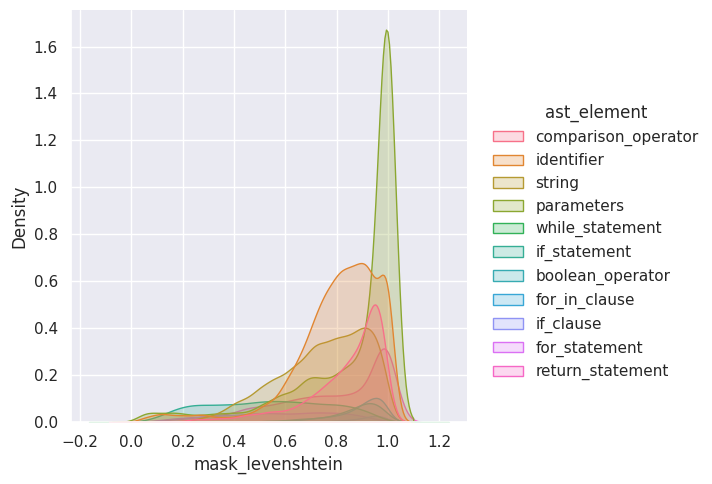

In [22]:
sns.displot(eval_df, x="mask_levenshtein", hue="ast_element", kind="kde", fill=True)
#log_scale=True,

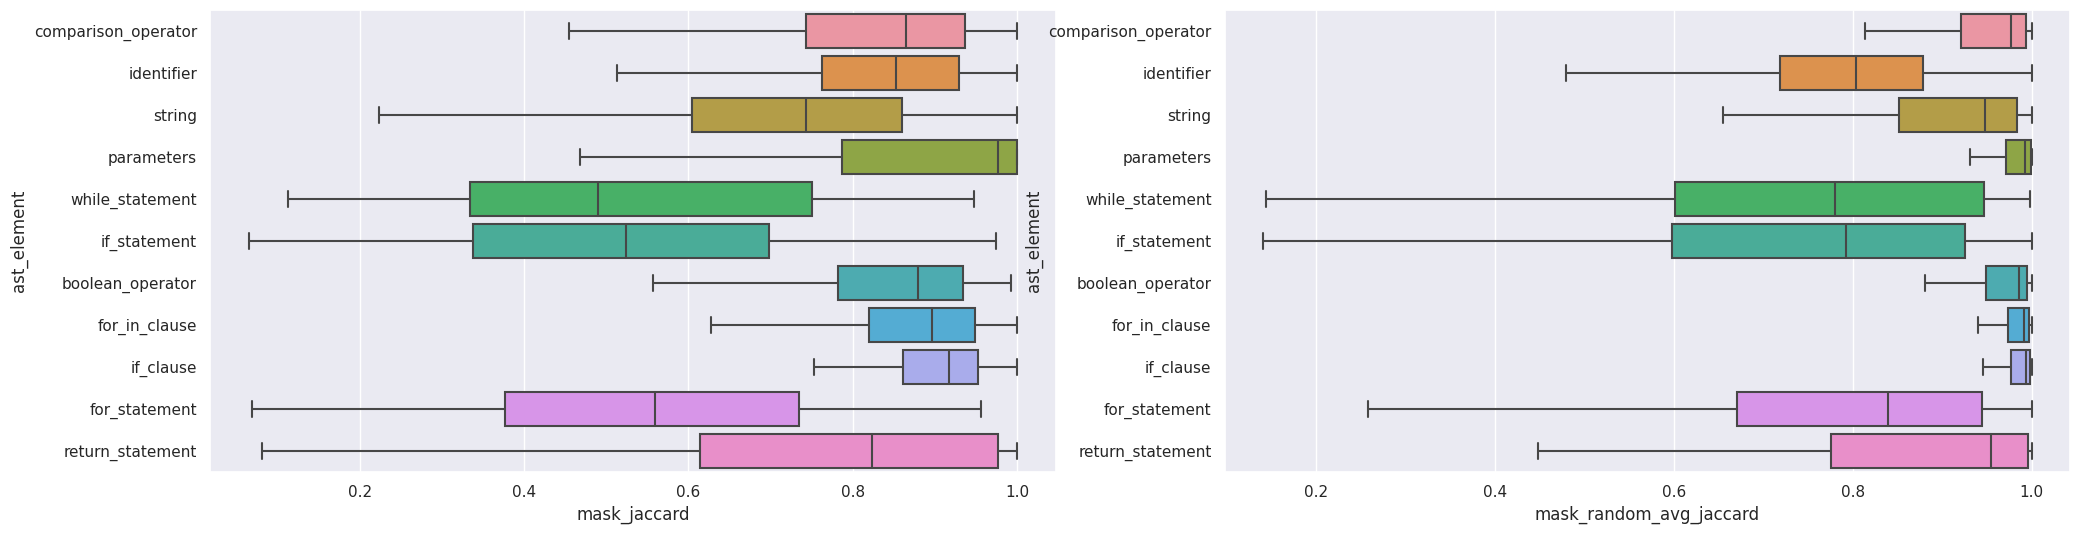

In [36]:
fig, axs = plt.subplots( figsize=(24,6), ncols=2 )
for i,key in enumerate(['mask_jaccard','mask_random_avg_jaccard']):
    #plt.figure(i)
    #sns.boxplot(data=df_method_size[key], showfliers=False,ax=axs[i]).set_title(key)
    sns.boxplot(data=eval_df, x=key,  y="ast_element", showfliers=False, ax=axs[i])

In [9]:
eval_df['mask_levenshtein'].g

0       0.90
1       0.83
2       0.39
3       0.88
4       0.51
        ... 
45608   0.53
45609   1.00
45610   0.80
45611   0.62
45612   1.00
Name: mask_levenshtein, Length: 45613, dtype: float64